# Author:Abhishek Devanand Karande
## Task 1
## GRIPJANUARY

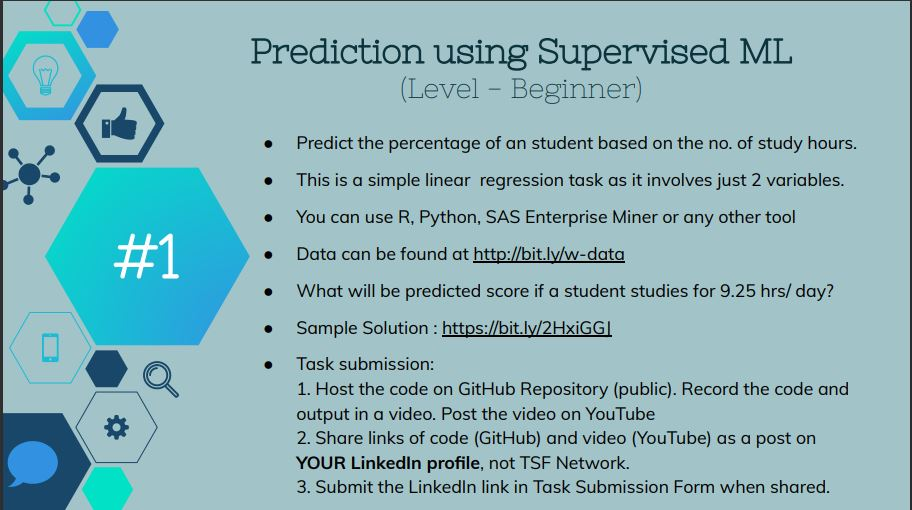

# Sparks Foundation : Data Science & Business Analytics Internship

## Simple Linear Regression
- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
- This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  

from sklearn.metrics import mean_absolute_error,mean_squared_error 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import dataset 
df=pd.read_csv("Students.csv")

In [3]:
#Read the Dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- Here we see that shape of data is (25 rows,2 columns)
- Data Type of Hours is Float and for Scores: Integer

In [6]:
# Check the description of the data.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- Minimum hrs: 1 and score:17 
- Maximum hrs:9.2 and score :95
- Average hrs: 4.8 and Score : 47

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- Here we can say that they both are highly co-related to each other because the difference is very less.

## Data Visualisation
- Now let's plot a graph of our data so that it will give us clear idea about data

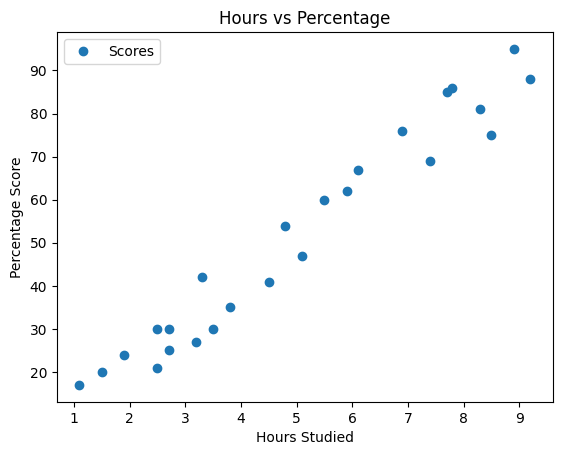

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o',)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


- We can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot: >

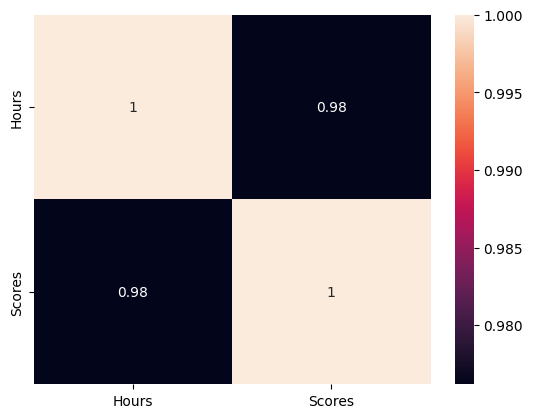

In [9]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: xlabel='Hours'>

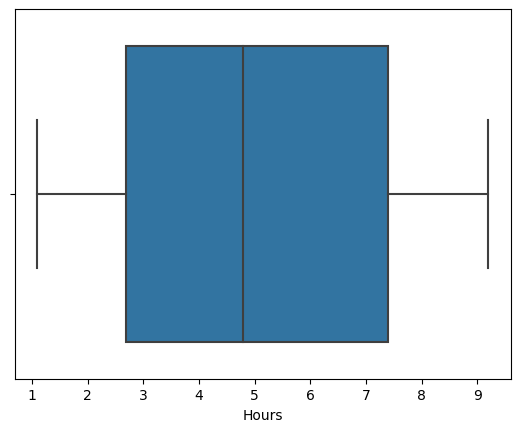

In [10]:
sns.boxplot(x="Hours",data=df)

<AxesSubplot: xlabel='Scores'>

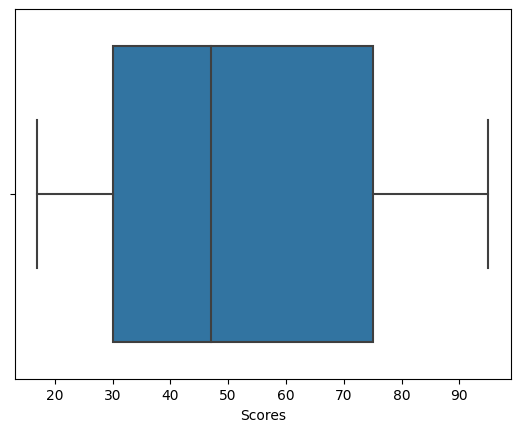

In [11]:
sns.boxplot(x="Scores",data=df)

- From the above boxplot, we can say that there is no outliers present in dataset.

<AxesSubplot: xlabel='Scores', ylabel='Hours'>

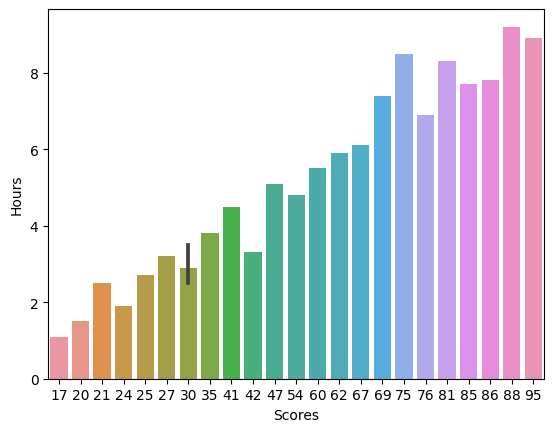

In [12]:
sns.barplot(df['Scores'],df['Hours'])


<AxesSubplot: xlabel='Scores', ylabel='Hours'>

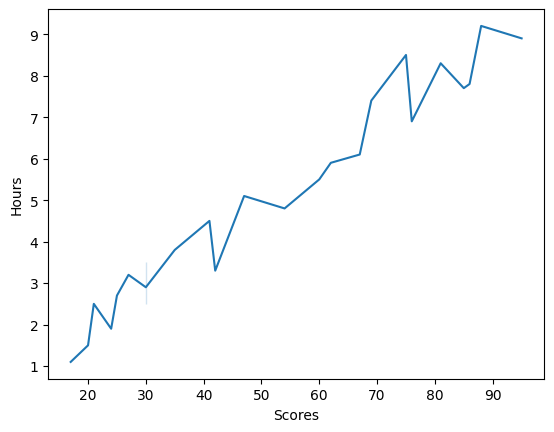

In [13]:
sns.lineplot(df['Scores'],df['Hours'])


## Model Building
### Linear Regression Model


In [14]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75,test_size=0.25,random_state=1)


In [15]:
print("Shape Of X_train",X_train.shape)
print("Shape Of X_test",X_test.shape)
print("Shape Of y_train",y_train.shape)
print("Shape Of y_test",y_test.shape)

Shape Of X_train (18, 1)
Shape Of X_test (7, 1)
Shape Of y_train (18,)
Shape Of y_test (7,)


### Training the model

In [16]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Training Complete')

Training Complete


In [17]:
y_pred=lr.predict(X_train)

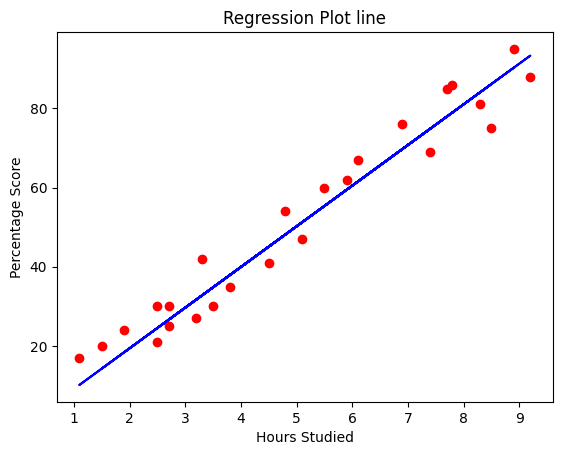

In [18]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X, line,"-b");
plt.title('Regression Plot line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### Checking the accuracy scores for training and test set

In [19]:
print('Test Score')
print(lr.score(X_test, y_test))
print('Training Score')
print(lr.score(X_train, y_train))

Test Score
0.8980888932690289
Training Score
0.965781943975883


In [20]:
# Testing data in hours
print(X_test)
y_pred1=lr.predict(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]
 [7.7]
 [6.1]]


In [21]:
y_pred1

array([10.1519013 , 32.73976133, 18.36566858, 86.12924869, 48.14057499,
       77.91548141, 61.48794684])

In [22]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred1})
data

,Actual,Predicted
0,17,10.151901
1,42,32.739761
2,24,18.365669
3,75,86.129249
4,54,48.140575
5,85,77.915481
6,67,61.487947


### Visually comparing the Prediceted scores with Actual Scores

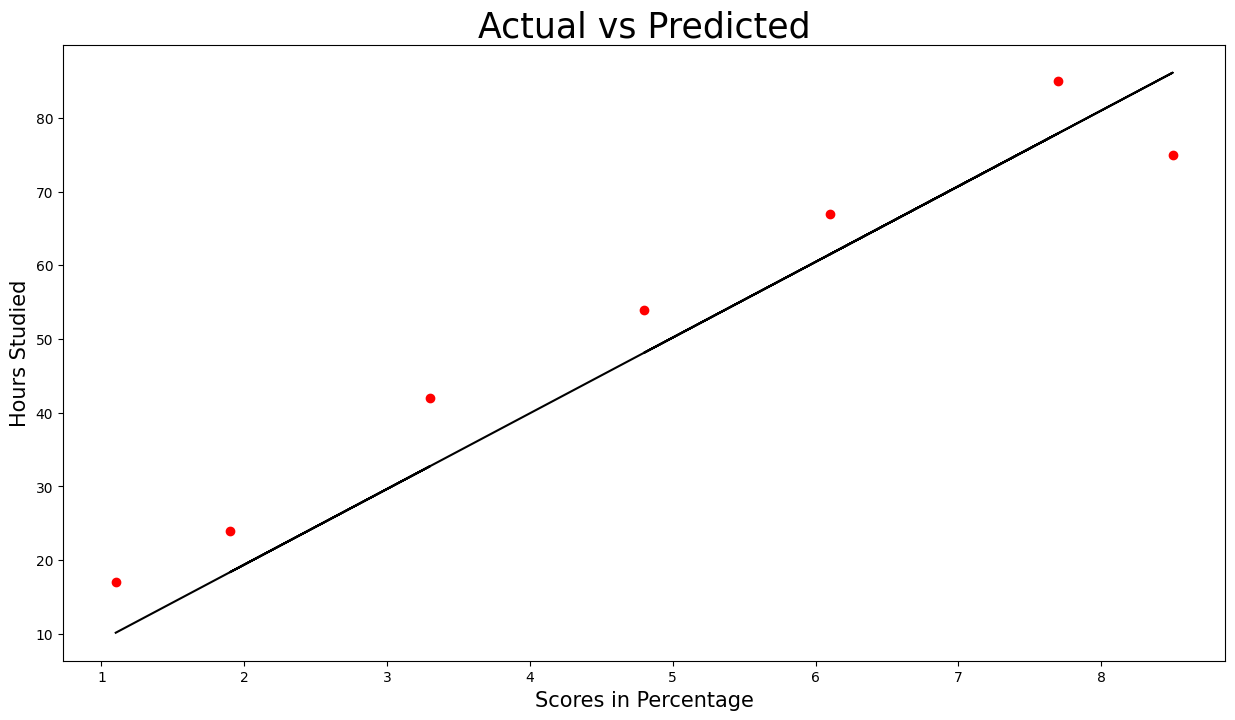

In [23]:
plt.figure(figsize=(15,8))
plt.scatter(x=X_test,y=y_test,color='red')
plt.plot(X_test,y_pred1,color="Black")
plt.title("Actual vs Predicted",size=25)
plt.xlabel('Scores in Percentage',size=15)
plt.ylabel("Hours Studied",size=15)
plt.show()

## Model Evaluation Metrics

In [24]:
#Checking the efficiency of model
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Squred Error:",mse)
print("Mean absolute Error:",mae)

Mean Squred Error: 57.59433403253168
Mean absolute Error: 7.3325591780007


## Let's predict the score for 9.25 hours


In [25]:
print('Score of student who studied for 9.25 hours a day is', lr.predict([[9.25]]))


Score of student who studied for 9.25 hours a day is [93.82965552]


# Conclusions:
## I was Successfully carry out the prediction using Supervised ML Task and able to evalute model's performance on various parameters.
## Acc. to Regression model If Student studied for 9.25 hrs a day then s/he is likely score 93.82 percentage in exam.